# 2. Develop Supervised learning models. (50)
○ Logistic Regression

○ Random Forest

○ Support Vector Machine

○ Neural Network

Compare the 4 methods based on the performance metrics and identify the best
model for this problem.
- Use 10 - fold cross validation.
- Use GridSearchCV for searching through hyper parameters.

In [9]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [10]:
# Import data

data = pd.read_csv("cancer.csv")

# Create features/inputs
X = data.drop(columns = ["Survival "])

# Create the output/class
y = data["Survival "]

# Splitting into training and testing datasets using KFold of 10 folds
kf = KFold()
KFold(n_splits=10)

for train_index, test_index in kf.split(data):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
data  

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


              precision    recall  f1-score   support

           1       0.76      0.93      0.84        45
           2       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



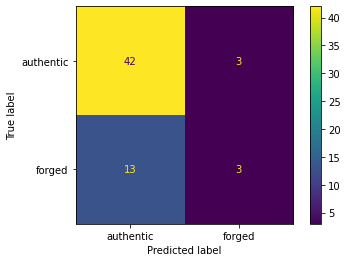

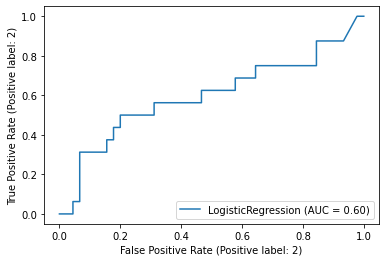

In [48]:
# Logistic Regression

# Defining and training the model
clf = LogisticRegression(solver = "newton-cg", penalty = "none", C = 100, random_state = 10).fit(X_train, y_train)

# Evaluating the model 
clf.score(X_test, y_test)

# Making predictions
y_pred = clf.predict(X_test)

# Creating the labels
labels = ["authentic", "forged"]

# Developing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()

              precision    recall  f1-score   support

           1       0.75      0.93      0.83        45
           2       0.40      0.12      0.19        16

    accuracy                           0.72        61
   macro avg       0.57      0.53      0.51        61
weighted avg       0.66      0.72      0.66        61



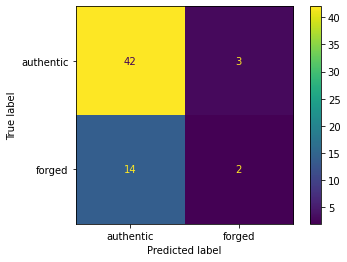

In [29]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 100, max_depth = 4, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        45
           2       0.00      0.00      0.00        16

    accuracy                           0.74        61
   macro avg       0.37      0.50      0.42        61
weighted avg       0.54      0.74      0.63        61



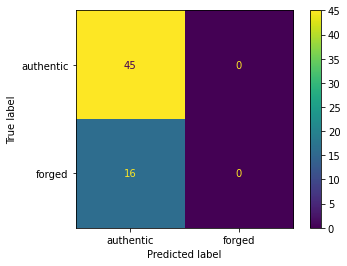

In [30]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "sigmoid", gamma =100, C=100).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        45
           2       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



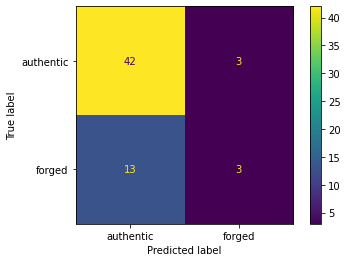

In [31]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "identity", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

In [18]:
# Implement grid search for parameter tuning -Logistic Regression

clf = LogisticRegression(solver = "newton-cg", penalty = "none", C = 100, random_state = 10).fit(X_train, y_train)

parameters = {'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'penalty': ('none', 'l1', 'l2', 'elasticnet'), 'C':[100, 10, 1.0, 0.1, 0.01]}

svm_grid = GridSearchCV(clf, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_


{'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}

In [19]:
# Implement grid search for parameter tuning -Random forest

rf = RandomForestClassifier(n_estimators = 100, max_depth = 4, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

parameters = {'max_features': ('sqrt', 'log2'), 'n_estimators': [10, 100, 1000], 'max_depth':[0,1,2,3,4,5,6,7,8,9]}


svm_grid = GridSearchCV(rf, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}

In [24]:
# Implement grid search for parameter tuning - Support Vector Machine

svm = SVC(random_state = 0, kernel = "sigmoid", gamma =100, C=1).fit(X_train, y_train)

parameters = {'gamma': [100,10,1.0,0.1], 'C':[100, 10,1.0,0.1,0.01]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_



{'C': 100, 'gamma': 100}

In [25]:
# Implement grid search for parameter tuning - Neural Networks

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)


parameters = {'solver': ('lbfgs', 'sgd', 'adam'), 'activation': ('identity', 'logistic', 'tanh', 'relu')}

nn_grid = GridSearchCV(nn, parameters)
nn_grid.fit(X_train, y_train)
nn_grid.best_params_

{'activation': 'identity', 'solver': 'lbfgs'}

3. Evaluate if the algorithms are overfitting? (10)

In [43]:
import statistics as st

kf=KFold(n_splits=10)
Score=[]


for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    Value=clf.score(X_train.iloc[train_indices], y_train.iloc[train_indices])
    Score.append(Value)
    
    
print("Average of all 10 folds of Logistic Regression is:", round(st.mean(Score),2))


Average of all 10 folds of Logistic Regression is: 0.75


In [44]:
import statistics as st

kf=KFold(n_splits=10)
Score=[]


for train_indices, test_indices in kf.split(X_train):
    rf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    Value=rf.score(X_train.iloc[train_indices], y_train.iloc[train_indices])
    Score.append(Value)
    
    
print("Average of all 10 folds of Random Forest is:", round(st.mean(Score),2))


Average of all 10 folds of Random Forest is: 0.82


In [45]:
import statistics as st

kf=KFold(n_splits=10)
Score=[]


for train_indices, test_indices in kf.split(X_train):
    svm.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    Value=svm.score(X_train.iloc[train_indices], y_train.iloc[train_indices])
    Score.append(Value)
    
    
print("Average of all 10 folds of Support Vector Machine is:", round(st.mean(Score),2))


Average of all 10 folds of Support Vector Machine is: 0.73


In [46]:
import statistics as st

kf=KFold(n_splits=10)
Score=[]


for train_indices, test_indices in kf.split(X_train):
    nn.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    Value=nn.score(X_train.iloc[train_indices], y_train.iloc[train_indices])
    Score.append(Value)
    
    
print("Average of all 10 folds of Neural Networks is:", round(st.mean(Score),2))


Average of all 10 folds of Neural Networks is: 0.75


Answer:

In Logistic Regression - score is 0.74 and average calculated is 0.75- Both are very closer, so there is no overfitting

In Random Forest - score is 0.72 and average calculated is 0.82- Both are very closer, so there is no overfitting


In Support Vector Machine - score is 0.74 and average calculated is 0.73- Both are very closer, so there is no overfitting


In Neural Networks - score is 0.74 and average calculated is 0.75- Both are very closer, so there is no overfitting

So, all the models are performing well.
